In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.datasets import cifar10

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [29]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~ 
print("train",x_train.shape,y_train.shape) #(50000, 32, 32, 3) (50000, 1)
print("test",x_test.shape,y_test.shape) # (10000, 32, 32, 3) (10000, 1)



train (50000, 32, 32, 3) (50000, 1)
test (10000, 32, 32, 3) (10000, 1)


In [30]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [31]:
# 크기변경
# x_train = x_train.reshape(50000, 32, 32, 3)
# x_test = x_test.reshape(50000, 32, 32, 3)

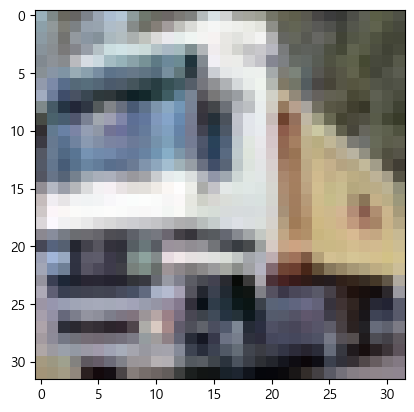

In [32]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [33]:
# 모델
# 베이스모델불러오기
from tensorflow.keras.applications import efficientnet
def build_model(input_shape, n_classes):

    base_model = efficientnet.EfficientNetB0(input_shape=input_shape,
                                      weights="imagenet",
                                      include_top=False,
                                      classes=10)

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_model(input_shape=(32, 32, 3), n_classes=10)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


In [34]:


# model = Sequential([
#     # 5X5 이미지 채널 1개 
#     # 필터 = output 노드수 
#     # 자르는 필터는 2X2 사이즈 
#     Conv2D(filters=128,kernel_size=(2,2),input_shape=(32,32,3),activation="relu"),

#     Conv2D(filters=64,kernel_size=(2,2),activation="relu"),   
     
     
#     # 완전통합층에서는 falt + Flatten(),
#     # Dense 의 인풋은 batch_size , input_dim
#     Flatten(),
#     Dense(32,activation="relu"),
#     Dense(10,activation="softmax")
# ])

# model.summary()

In [35]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =30,
                              # True 면 좋았던 웨이트로 복원됨
                              # False 면 마지막 웨이트로 놔둠..
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= "cifar.h5",
    verbose=1 
)
                    

hist = model.fit(
                x_train,
                y_train,
                epochs=100,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],      
                )

Epoch 1/100
624/625 [============================>.] - ETA: 0s - loss: 1.1652 - acc: 0.6125
Epoch 00001: val_loss improved from inf to 0.74384, saving model to cifar.h5


c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


625/625 [==============================] - 45s 62ms/step - loss: 1.1643 - acc: 0.6127 - val_loss: 0.7438 - val_acc: 0.7459
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 0.6869 - acc: 0.7709
Epoch 00002: val_loss improved from 0.74384 to 0.61707, saving model to cifar.h5
625/625 [==============================] - 37s 59ms/step - loss: 0.6869 - acc: 0.7709 - val_loss: 0.6171 - val_acc: 0.7956
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 0.5537 - acc: 0.8162
Epoch 00003: val_loss improved from 0.61707 to 0.54846, saving model to cifar.h5
625/625 [==============================] - 39s 62ms/step - loss: 0.5537 - acc: 0.8162 - val_loss: 0.5485 - val_acc: 0.8157
Epoch 4/100
625/625 [==============================] - ETA: 0s - loss: 0.4756 - acc: 0.8418
Epoch 00004: val_loss improved from 0.54846 to 0.52992, saving model to cifar.h5
625/625 [==============================] - 38s 61ms/step - loss: 0.4756 - acc: 0.8418 - val_loss: 0.5299 - val_a

KeyboardInterrupt: 

In [38]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 6s 20ms/step - loss: 0.6740 - acc: 0.8279
loss :  0.6739703416824341
acc :  0.8278999924659729


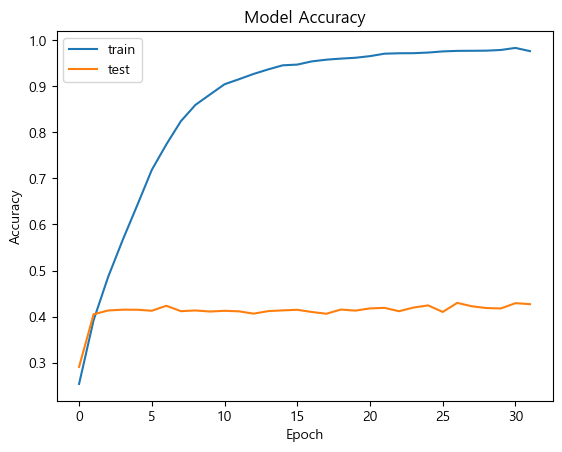

In [41]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

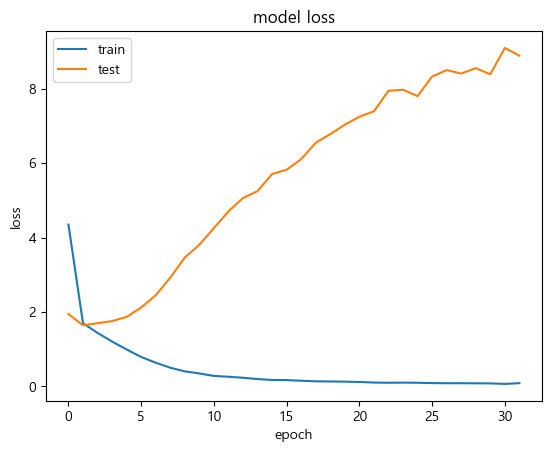

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()